# Lab 5 | EDA & Visualisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("../data/students.csv")
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  100 non-null    int64  
 1   age         100 non-null    int64  
 2   gpa         90 non-null     float64
 3   gender      100 non-null    object 
 4   major       95 non-null     object 
 5   year        100 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


student_id     0
age            0
gpa           10
gender         0
major          5
year           0
dtype: int64

Which column has the most missing values and why might that be?
The column with the most missing values is the GPA column. There are multiple potential reasons why this is the case. First, there could be non-response bias as people may be embarrassed by their GPA's, especially if they're lower, or they simply don't want to reveal GPA's for privacy reasons. It could also be that the data here is harder to extract because it is more sensitive and private.

In [2]:
columns = ['age', 'gpa']

stats = {
    'count': [],
    'mean': [],
    'median': [],
    'variance': [],
    'standard_deviation': [],
    'min': [],
    'max': []
}

for col in columns:
    stats['count'].append(int(df[col].count()))
    stats['mean'].append(float(df[col].mean()))
    stats['median'].append(df[col].median())
    stats['variance'].append(df[col].var())
    stats['standard_deviation'].append(df[col].std())
    stats['min'].append(df[col].min())
    stats['max'].append(df[col].max())

print(stats)

{'count': [100, 90], 'mean': [16.13, 2.624666666666667], 'median': [16.0, 2.665], 'variance': [1.8920202020202044, 0.2274319101123596], 'standard_deviation': [1.3755072526236292, 0.4768982177701649], 'min': [14, 1.63], 'max': [18, 3.93]}


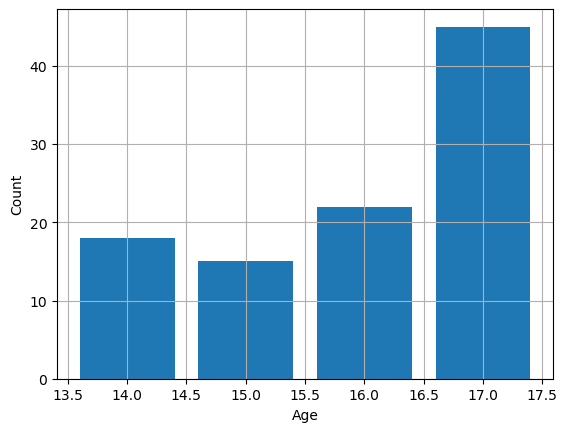

In [3]:
df['age'].hist(bins=range(14, 19), align = 'left', rwidth = 0.8)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Interesting feature: 17 years of age had by far the most number of students.

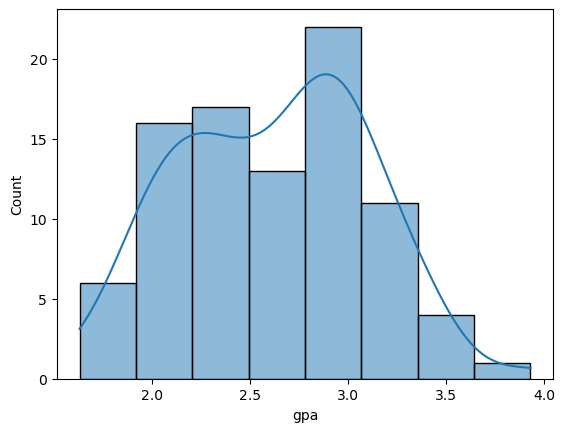

In [4]:
sns.histplot(df['gpa'], kde = True)
plt.show()

Interesting feature: Most of the GPA's were around 2.0-3.0, with relatively few being higher than 3.0.

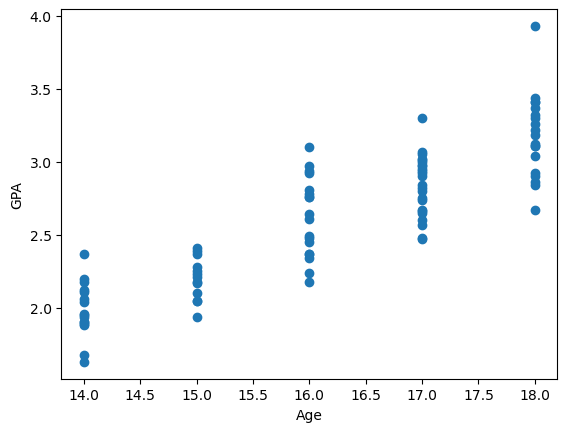

np.float64(0.8786075344584666)

In [5]:
plt.scatter(df['age'], df['gpa'])
plt.xlabel("Age"), plt.ylabel("GPA")
plt.show()
df['age'].corr(df['gpa'])

GPA trends upwards with age in this dataset because the correlation was positive and close to 1, indicating a strong, linear, positive relationship between the two.

In [6]:
df['major'] = df['major'].str.lower()
df['major'] = df['major'].str.strip()
df['major'] = df['major'].replace('', np.nan)
df = df.dropna(subset=['major'])


In [7]:
df.to_csv('../data/students_clean.csv', index=False)

Conclusion: The data and graphs illustrate how this data set has a positive correlation between gpa and age. This means that as people got older, their gpa's typically increased. This could be due to a variety of factors such as increased maturity (people are more motiavted to work harder in school). 